# DATA MINING IRIS

Iris dataset adalah salah satu dataset yang paling terkenal dalam ilmu data. Dataset ini pertama kali diperkenalkan oleh ahli botani Ronald Fisher pada tahun 1936 dalam karyanya yang terkenal "The Use of Multiple Measurements in Taxonomic Problems". Dataset ini terdiri dari pengukuran morfologi dari 150 bunga iris yang berasal dari tiga spesies iris yang berbeda: Iris setosa, Iris versicolor, dan Iris virginica.

<img src="untitled/download.jpg" width="" align="" />

Setiap bunga iris dalam dataset ini diukur berdasarkan empat fitur (variabel):

- Panjang Kelopak Sepal (Sepal Length): Panjang dalam cm dari kelopak sepal bunga iris.

- Lebar Kelopak Sepal (Sepal Width): Lebar dalam cm dari kelopak sepal bunga iris.

- Panjang Mahkota (Petal Length): Panjang dalam cm dari mahkota bunga iris.

- Lebar Mahkota (Petal Width): Lebar dalam cm dari mahkota bunga iris.

sebelum memulai import dahulu library yang akan digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Memahami Data

## Siapkan database

Untuk data yang akan digunakan sendiri, nantinya akan ditempatkan ke dalam database, saya sendiri menggunakan 2 database yaitu

- MySQL 

- Postgre

Kedua database ini nantinya akan terintegrasi dengan cloud dari situs aiven.io

### Menampilkan Data

Pada tahapan ini saya akan mendeskripsikan data yang didapat dari Iris kaggle, yang nantinya akan ditaruh pada 2 database yang berbeda yaitu pada database mysql dan juga pada postgre, data tersebut nantinya akan diolah untuk pembelajaran

ambil data yang berada pada cloud aiven di database mysql

In [2]:
!pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 51.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:

import mysql.connector
import pandas as pd

# Informasi koneksi ke database MySQL di cloud aiven
hostname = 'mysql-3832c5d5-ikbar21116.a.aivencloud.com'
port = 28482
username = 'avnadmin'
password = 'AVNS_mwAH3wybkSrDiGU5knO'
database = 'defaultdb'


# Membuat koneksi ke database MySQL
conn = mysql.connector.connect(
    host=hostname,
    port=port,
    user=username,
    password=password,
    database=database
)

# Membaca data dari database menggunakan Pandas
query = "SELECT * FROM data1"
df_1 = pd.read_sql(query, conn)

# Menutup koneksi ke database
conn.close()

/tmp/ipykernel_128/802532185.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_1 = pd.read_sql(query, conn)


tampilkan data

In [4]:
df_1

,Id,SepalLengthCm,SepalWidthCm,Species
0,1,5.1,3.5,Iris-setosa
1,2,4.9,3.0,Iris-setosa
2,3,4.7,3.2,Iris-setosa
3,4,4.6,3.1,Iris-setosa
4,5,NaN,3.6,None
...,...,...,...,...
145,146,6.7,3.0,Iris-virginica
146,147,6.3,2.5,Iris-virginica
147,148,6.5,3.0,Iris-virginica
148,149,6.2,3.4,Iris-virginica


ambil data yang berada pada cloud aiven di database postgre

In [5]:
import psycopg2
import pandas as pd
# Informasi koneksi ke database MySQL di cloud aiven
hostname = 'pg-26b96dca-ikbar21116.a.aivencloud.com'
port = 28482
username = 'avnadmin'
password = 'AVNS_nUE4C-O886Wgyzsy_RS'
database = 'defaultdb'


# Membuat koneksi ke database MySQL
conn = psycopg2.connect(
    host=hostname,
    port=port,
    user=username,
    password=password,
    database=database
)

# Membaca data dari database menggunakan Pandas
query = "SELECT * FROM iris"
df_2 = pd.read_sql(query, conn)

# Menutup koneksi ke database
conn.close()

/tmp/ipykernel_128/1299739618.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2 = pd.read_sql(query, conn)


menampilkan data dari database postgre 

In [6]:
df_2

,Id,PetalLengthCm,PetalWidthCm
0,1,1.4,0.2
1,2,1.4,0.2
2,3,1.3,0.2
3,4,1.5,0.2
4,5,1.4,0.2
...,...,...,...
145,146,5.2,2.3
146,147,5.0,1.9
147,148,5.2,2.0
148,149,5.4,2.3


### Penggabungan dua tabel dari sumber yang berbeda

menggabungkan kedua tabel tersebut agar dapat diolah, untuk penggabungannya sendiri menggunakan acuan dari Id yang ada pada kedua tabel tersebut

In [7]:
import pandas as pd

merged_df = pd.merge(df_1, df_2, on='Id')
merged_df = merged_df.reindex(['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'], axis="columns")
merged_df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,NaN,3.6,1.4,0.2,None
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Pembersihan data

membersihkan data yang mempunyai Species NULL data dan mendropnya, fungsi dari pembersihan data ini adalah agar ketika menginputkan nilai dari SepalLengthCm menggunakan knn dan mean, tidak ada data yang NULL pada Species

In [8]:
df_cleaned = merged_df.dropna(subset=['Species'])
df_cleaned

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Mencari missing values

In [9]:
rows_with_null = df_cleaned[df_cleaned.isnull().any(axis=1)]
rows_with_null

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
18,19,NaN,3.8,1.7,0.3,Iris-setosa
54,55,NaN,2.8,4.6,1.5,Iris-versicolor
112,113,NaN,3.0,5.5,2.1,Iris-virginica


## Melakukan duplikasi data

membuat data copy yang sudah dibersihkan pada bagian Speciesnya lalu membuat dataframe baru yang akan digunakan untuk memasukkan metode knn

### duplikasi data untuk metode knn

In [10]:
df_knn = df_cleaned.copy()
df_knn

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 

membuat data duplikat juga untuk dimasukkan rata-rata atau average dari Species

In [11]:
df_mean = df_cleaned.copy()
df_mean

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Mencari Duplikasi Pada Data

In [12]:
df_cleaned_dup = df_mean.drop_duplicates()
df_cleaned_dup

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


melihat data teratas 

In [13]:
print(df_cleaned_dup.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa


setelah itu menjelaskan data tersebut, termasuk hitungan, mean, nilai min dan max serta beberapa persentil.

In [14]:
print(df_cleaned_dup.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  148.000000     145.000000    148.000000     148.000000    148.000000
mean    75.756757       5.828966      3.051351       3.757432      1.201351
std     43.267971       0.824698      0.434011       1.753212      0.762290
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.750000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    113.250000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


# Preprocessing

pada tabel yang sudah digabungkan dari 2 data tersebut nantinya akan dibuatkan tabel baru yang akan digunakan sebagai test dan bahan percobaan

kode dibawah untuk menunjukkan ada berapa banyak data yang kosong disetiap kolom

In [15]:
print(merged_df.isnull().sum())

Id               0
SepalLengthCm    5
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          2
dtype: int64


In [16]:
null_data = df_knn.loc[df_knn['SepalLengthCm'].isnull()]

null_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
18,19,NaN,3.8,1.7,0.3,Iris-setosa
54,55,NaN,2.8,4.6,1.5,Iris-versicolor
112,113,NaN,3.0,5.5,2.1,Iris-virginica


## Mencari nilai rata-rata

Mencari nilai rata2 dari setiap SepalLengthCm yang kosong dari setiap Species

In [17]:
setosa_df = df_mean[df_mean['Species'] == 'Iris-setosa']
mean_sepal_length_setosa = setosa_df['SepalLengthCm'].mean().round(1)
print(mean_sepal_length_setosa)


5.0


In [18]:
color_df = df_mean[df_mean['Species'] == 'Iris-versicolor']
mean_sepal_length_color = color_df['SepalLengthCm'].mean().round(1)
print(mean_sepal_length_color)


5.9


In [19]:
virgi_df = df_mean[df_mean['Species'] == 'Iris-virginica']
mean_sepal_length_virgi = virgi_df['SepalLengthCm'].mean().round(1)
print(mean_sepal_length_virgi)


6.6


## Menginputkan nilai mean ke Dataframe

Setelah mendapat nilai rata-rata dari setiap Species, saya akan memasukkan nilai tersebut kedalam dataFrame yang sudah dibuat untuk input nilai yang sudah didapatkan diatas

In [20]:
rows_with_null = df_mean[df_mean['SepalLengthCm'].isnull()]


df_mean.loc[(df_mean['Species'] == 'Iris-setosa') & (df_mean['SepalLengthCm'].isnull()), 'SepalLengthCm'] = mean_sepal_length_setosa
df_mean.loc[(df_mean['Species'] == 'Iris-versicolor') & (df_mean['SepalLengthCm'].isnull()), 'SepalLengthCm'] = mean_sepal_length_color
df_mean.loc[(df_mean['Species'] == 'Iris-virginica') & (df_mean['SepalLengthCm'].isnull()), 'SepalLengthCm'] = mean_sepal_length_virgi

df_mean

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Menginputkan data menggunakan metode knn

pada bagian ini saya akan menginputkan nilai rata-rata dari setiap SepalLengthCm dari Species untuk mengisi ke kolom yang memiliki NULL dengan metode knn

In [21]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
df_knn['SepalLengthCm'] = imputer.fit_transform(df_knn[['SepalLengthCm']]).round(1)

df_knn

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Memasukkan data ke dalam tabel 

Untuk pada bagian ini saya akan memasukkan data yang telah saya peroleh yaitu SepalLengthCm yang menggunakan rata-rata dan dengan metode knn ke tabel baru yang sudah mempunyai isi dari data iris yang masib belum mempunyai nilai NULL atau belum dirubah isinya.

In [22]:
import pymysql

# Mengatur koneksi ke database MySQL
host = 'mysql-3832c5d5-ikbar21116.a.aivencloud.com'
user = 'avnadmin'
password = 'AVNS_mwAH3wybkSrDiGU5knO'
database = 'defaultdb'
port = 28482
conn = pymysql.connect(host=host, user=user, password=password, database=database, port=port)

# Nama kolom yang ingin dimasukkan ke dalam tabel
kolom_id = 'Id'
kolom_1 = 'SepalLengthCm_mean'
kolom_2 = 'SepalLengthCm_knn'

# Nama tabel di database
nama_tabel = 'data_preprocessing'

# Mendapatkan nilai dari kolom DataFrame
nilai_kolom_id = df_mean['Id']
nilai_kolom_1 = df_mean['SepalLengthCm']
nilai_kolom_2 = df_knn['SepalLengthCm']

# Membuat kursor untuk eksekusi perintah SQL
cursor = conn.cursor()

# Memasukkan nilai ke dalam tabel
for id, nilai_1, nilai_2 in zip(nilai_kolom_id, nilai_kolom_1, nilai_kolom_2):
    if pd.isnull(id):  # Jika Id kosong, gunakan pernyataan INSERT INTO
        query = f"INSERT INTO {nama_tabel} ({kolom_1}, {kolom_2}) VALUES ('{nilai_1}', '{nilai_2}')"
    else:  # Jika Id sudah ada, gunakan pernyataan UPDATE
        query = f"UPDATE {nama_tabel} SET {kolom_1} = '{nilai_1}', {kolom_2} = '{nilai_2}' WHERE {kolom_id} = {id}"
    cursor.execute(query)

# Melakukan commit untuk menyimpan perubahan
conn.commit()

# Menutup koneksi
conn.close()


Setelah itu tampilkan data yang telah diinputkan ke tabel baru dalam database

In [23]:
df_3 = _deepnote_execute_sql('SELECT * FROM data_preprocessing', 'SQL_59446299_EF9E_4DEA_B1AA_5D8CFCBE7E1C', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

,Id,SepalLengthCm,SepalLengthCm_mean,SepalLengthCm_knn
0,1,5.1,5.1,5.1
1,2,4.9,4.9,4.9
2,3,4.7,4.7,4.7
3,4,4.6,4.6,4.6
4,5,5.0,NaN,NaN
...,...,...,...,...
145,146,6.7,6.7,6.7
146,147,6.3,6.3,6.3
147,148,6.5,6.5,6.5
148,149,6.2,6.2,6.2


## Visualisasi Data

Visualisasi data merupakan cara yang bagus untuk memahami data,visualisasi data pada dataset iris merupakan cara yang bagus untuk memahami karakteristik dari setiap kelas iris (setosa, versicolor, dan virginica) serta hubungan antara fitur-fiturnya (seperti panjang dan lebar kelopak dan mahkota). Di bawah ini, adalah visualisasi data yang sudah dibersihkan dari duplikasi data:

### visualisasi data dari mean

- box and whisker plots

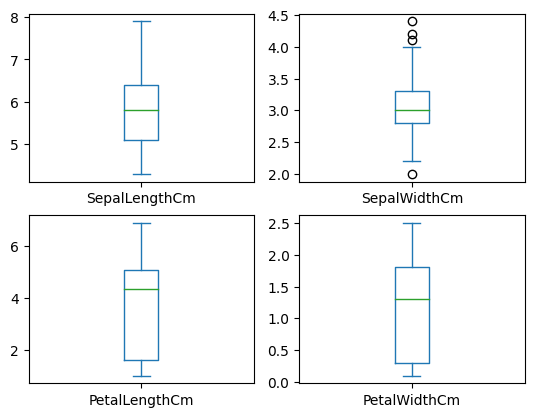

In [24]:
import matplotlib.pyplot as plt

# Drop 'id' and 'species' columns
df_mean_atr = df_mean.drop(columns=['Id', 'Species'])

# Determine the layout based on the number of columns
num_columns = len(df_mean_atr.columns)
num_rows = (num_columns + 1) // 2  

# Plotting with adjusted layout
df_mean_atr.plot(kind='box', subplots=True, layout=(num_rows, 2), sharex=False, sharey=False)
plt.show()


- histograms

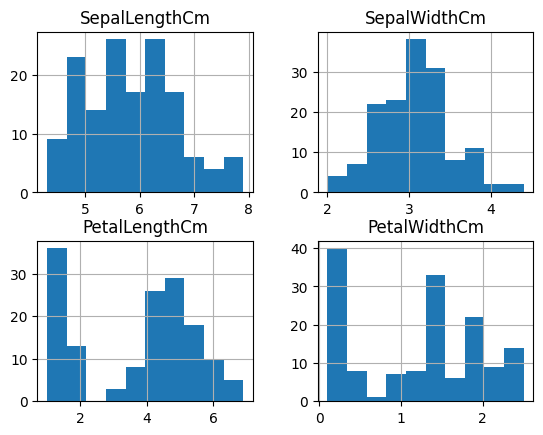

In [25]:
df_mean_atr.hist()
plt.show()

- scatter plot matrix

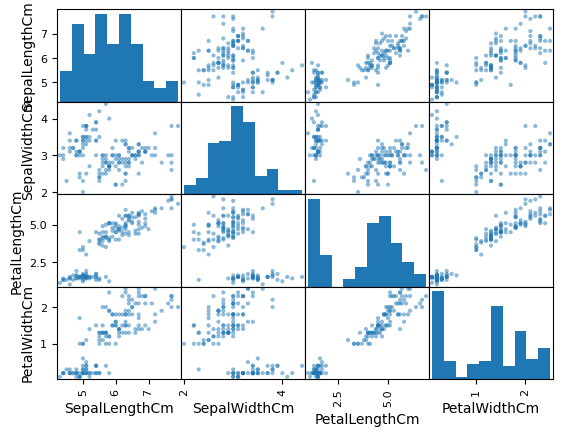

In [26]:
import pandas.plotting as pd_plotting
import matplotlib.pyplot as plt

pd_plotting.scatter_matrix(df_mean_atr)
plt.show()


### visualisasi data dari knn

- box and whisker plots

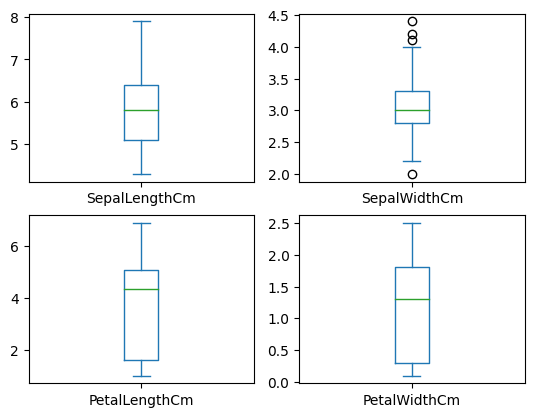

In [27]:
import matplotlib.pyplot as plt

# Drop 'id' and 'species' columns
df_knn_atr = df_knn.drop(columns=['Id', 'Species'])

# Determine the layout based on the number of columns
num_columns = len(df_knn_atr.columns)
num_rows = (num_columns + 1) // 2  

# Plotting with adjusted layout
df_knn_atr.plot(kind='box', subplots=True, layout=(num_rows, 2), sharex=False, sharey=False)
plt.show()


- histograms

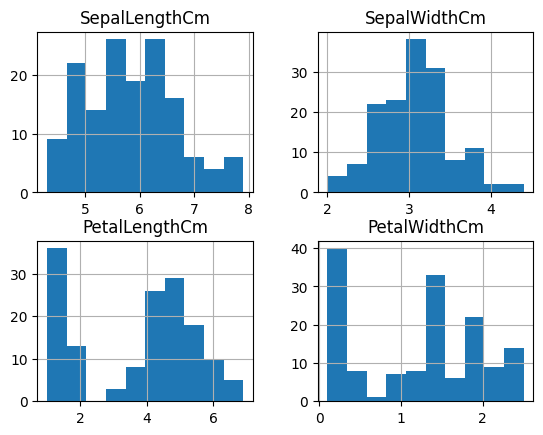

In [28]:
df_knn_atr.hist()
plt.show()

- scatter plot matrix

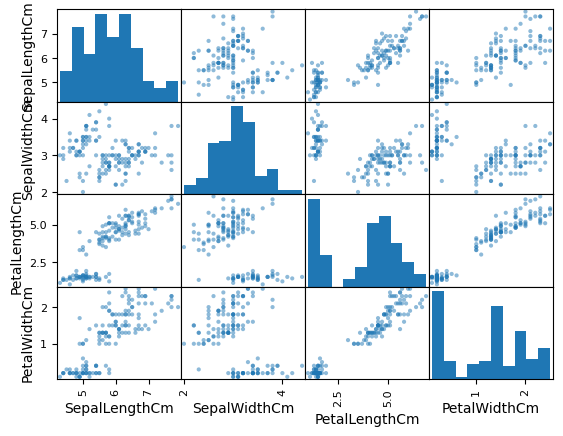

In [29]:
import pandas.plotting as pd_plotting
import matplotlib.pyplot as plt

pd_plotting.scatter_matrix(df_knn_atr)
plt.show()


### Visualisasi data untuk Species

pertama-tama yaitu mengambil data Species dari data frame df_cleaned_dup, yaitu data yang sudah dibersihkan namun masih ada nilai NULL pada SepalLengthCm

In [30]:
Species = df_cleaned_dup['Species'].value_counts().reset_index()
Species

,Species,count
0,Iris-versicolor,50
1,Iris-setosa,49
2,Iris-virginica,49


Setelah itu tampilkan visualisasi data

## Deteksi Outliers(Local Outlier Factor)

### Konsep Local Outlier Faktor

Algoritme Local Outlier Factor (LOF) adalah metode deteksi anomali tanpa pengawasan yang menghitung deviasi kepadatan lokal dari titik data tertentu terhadap titik data tetangganya. Ini menganggap sampel yang memiliki kepadatan jauh lebih rendah daripada sampel tetangganya sebagai outlier. metode ini digunakan untuk mendeteksi outlier dalam data multidimensi dengan memperhitungkan kepadatan lokal. LOF mengukur derajat "keanehan" atau "kelainan" dari sebuah titik data terhadap tetangga-tetangganya. Pendekatan ini bermanfaat karena bisa mengidentifikasi outlier yang tidak bisa dideteksi hanya dengan mempertimbangkan jarak absolut dari tetangganya.

Local Outlier Factor juga memiliki beberapa konsep yang hars dipahami secara berurutan yaitu

- K-distance (dist_K)  dan K-neighbors

<img src="image-20240320-220140.png" width="" align="" />

K-distance (dist_K) adalah jarak ke tetangga terdekat ke K. K-neighbors dilambahkan dengan Nk(A) mencakup himpunan titik yang terletak di dalam atau pada lingkaran berjari-jari jarak K. K-tetangga bisa lebih dari atau sama dengan nilai K.


- Reachability Density(RD)

- Local Reachability Density(LRD)

- Local Outlier Factor(LOF)

### Menghitung manual Local Outlier Factor

data contoh data dengan tipe numerik 3 fitur jumlah data 10 k=3 p=2 (euclidian distance), berikut merupakan contohnya :

<img src="untitled/image-20240319-233722.png" width="" align="" />

1. MENGHITUNG JARAK DAN MENETUKAN K-NEIGHBOUR

Untuk tahap pertama, kita melakukan perhitungan pada semua jarak antara setiap data dengan euclidean distance, untuk rumusnya seperti dibawah ini

<img src="rumus_euclidean.png" width="" align="" />

<img src="untitled/image-20240320-001121.png" width="" align="" />

Setelah itu tentukan 3 jarak terdekat dari setiap data (K=3)

$$
\begin{aligned}
&\text{Dist}(A) = \text{Dist}(A,E) = \sqrt{6} \approx 2.449 \\
&\text{Dist}(A) = \text{Dist}(A,J) = \sqrt{6} \approx 2.449 \\
&\text{Dist}(A) = \text{Dist}(A,C) = \sqrt{13} \approx 3.606 \\
\\
&\text{Dist}(B) = \text{Dist}(B,G) = \sqrt{5} \approx 2.236 \\
&\text{Dist}(B) = \text{Dist}(B,D) = \sqrt{42} \approx 6.481 \\
&\text{Dist}(B) = \text{Dist}(B,E) = \sqrt{43} \approx 6.557 \\
\\
&\text{Dist}(C) = \text{Dist}(C,A) = \sqrt{13} \approx 3.606 \\
&\text{Dist}(C) = \text{Dist}(C,J) = \sqrt{14} \approx 3.742 \\
&\text{Dist}(C) = \text{Dist}(C,E) = \sqrt{18} \approx 4.243 \\
\\
&\text{Dist}(D) = \text{Dist}(D,G) = \sqrt{10} \approx 3.162 \\
&\text{Dist}(D) = \text{Dist}(D,C) = \sqrt{19} \approx 4.359 \\
&\text{Dist}(D) = \text{Dist}(D,E) = \sqrt{26} \approx 5.099 \\
\\
&\text{Dist}(E) = \text{Dist}(E,A) = \sqrt{6} \approx 2.449 \\
&\text{Dist}(E) = \text{Dist}(E,J) = \sqrt{10} \approx 3.162 \\
&\text{Dist}(E) = \text{Dist}(E,G) = \sqrt{18} \approx 4.243 \\
\\
&\text{Dist}(F) = \text{Dist}(F,I) = \sqrt{65} \approx 8.062 \\
&\text{Dist}(F) = \text{Dist}(F,J) = \sqrt{65} \approx 8.062 \\
&\text{Dist}(F) = \text{Dist}(F,A) = \sqrt{77} \approx 8.774 \\
\\
&\text{Dist}(G) = \text{Dist}(G,B) = \sqrt{5} \approx 2.236 \\
&\text{Dist}(G) = \text{Dist}(G,D) = \sqrt{10} \approx 3.162 \\
&\text{Dist}(G) = \text{Dist}(G,A) = \sqrt{14} \approx 3.742 \\
\\
&\text{Dist}(H) = \text{Dist}(H,C) = \sqrt{26} \approx 5.099 \\
&\text{Dist}(H) = \text{Dist}(H,I) = \sqrt{33} \approx 5.745 \\
&\text{Dist}(H) = \text{Dist}(H,A) = \sqrt{34} \approx 5.831 \\
\\
&\text{Dist}(I) = \text{Dist}(I,J) = \sqrt{17} \approx 4.123 \\
&\text{Dist}(I) = \text{Dist}(I,H) = \sqrt{33} \approx 5.745 \\
&\text{Dist}(I) = \text{Dist}(I,G) = \sqrt{53} \approx 7.28 \\
\\
&\text{Dist}(J) = \text{Dist}(J,A) = \sqrt{6} \approx 2.449 \\
&\text{Dist}(J) = \text{Dist}(J,E) = \sqrt{10} \approx 3.162 \\
&\text{Dist}(J) = \text{Dist}(J,C) = \sqrt{14} \approx 3.742 \\
\end{aligned}
$$

Setelah itu tentukan Jarak terdekat ketiga dari masing2 data 

$$
\begin{aligned}
&\text{Dist}_{3}(A) = \text{Dist}(A,C) = \sqrt{13} \approx 3.606 \\
&\text{Dist}_{3}(B) = \text{Dist}(B,E) = \sqrt{43} \approx 6.557 \\
&\text{Dist}_{3}(C) = \text{Dist}(C,E) = \sqrt{18} \approx 4.243 \\
&\text{Dist}_{3}(D) = \text{Dist}(D,E) = \sqrt{26} \approx 5.099 \\
&\text{Dist}_{3}(E) = \text{Dist}(E,G) = \sqrt{18} \approx 4.243 \\
&\text{Dist}_{3}(F) = \text{Dist}(F,A) = \sqrt{77} \approx 8.774 \\
&\text{Dist}_{3}(G) = \text{Dist}(G,A) = \sqrt{14} \approx 3.742 \\
&\text{Dist}_{3}(H) = \text{Dist}(H,A) = \sqrt{34} \approx 5.831 \\
&\text{Dist}_{3}(I) = \text{Dist}(I,G) = \sqrt{53} \approx 7.28 \\
&\text{Dist}_{3}(J) = \text{Dist}(J,C) = \sqrt{14} \approx 3.742 \\
\end{aligned}
$$

2. Menghitung Reachability Distance(RD)

Setelah mendapat Jarak Terdekat ketiga dari masing-masing data, selanjutnya melakukan perhitungan Reachability Distance 

$$
\begin{aligned}
&\text{N}_{3}(A) = \left\{J,E,C\right\} = 3\\
&\text{N}_{3}(B) = \left\{G,D,E\right\} = 3\\
&\text{N}_{3}(C) = \left\{A,J,E\right\} = 3\\
&\text{N}_{3}(D) = \left\{G,C,E\right\} = 3\\
&\text{N}_{3}(E) = \left\{A,J,G\right\} = 3\\
&\text{N}_{3}(F) = \left\{I,J,A\right\} = 3\\
&\text{N}_{3}(G) = \left\{B,D,A\right\} = 3\\
&\text{N}_{3}(H) = \left\{C,I,A,J\right\} = 4\\
&\text{N}_{3}(I) = \left\{J,H,G\right\} = 3\\
&\text{N}_{3}(J) = \left\{A,E,C\right\} = 3\\
\end{aligned}
$$

Setelah itu hitung Reachability Distance dari maring-masing objek, untuk rumusnya yaitu :

<img src="rd.png" width="50%" align="" />

<img src="image-20240321-000458.png" width="" align="" />

3. Menghitung Local Reachability Distance (LRD)

Selanjutnya melakukan perhitungan Local Reachability Distance (LRD), LRD dirumuskan seperti di bawah ini :

<img src="image-20240320-015046.png" width="50%" align="" />

Berdasarkan rumus diatas, kita dapat melakukan perhitungan seperti berikut :

$$
\begin{aligned}
lrd_{3}(A)=\frac{3}{\sqrt{18}+\sqrt{19}+\sqrt{20}}=0.229\\
lrd_{3}(B)=\frac{3}{\sqrt{43}+\sqrt{26}+\sqrt{14}}=0.194\\
lrd_{3}(C)=\frac{3}{\sqrt{18}+\sqrt{14}+\sqrt{13}}=0.258\\
lrd_{3}(D)=\frac{3}{\sqrt{18}+\sqrt{14}+\sqrt{13}}=0.258\\
lrd_{3}(E)=\frac{3}{\sqrt{18}+\sqrt{14}+\sqrt{29}}=0.224\\
lrd_{3}(F)=\frac{3}{\sqrt{77}+\sqrt{77}+\sqrt{65}}=0.117\\
lrd_{3}(G)=\frac{3}{\sqrt{77}+\sqrt{65}+\sqrt{43}}=0.128\\
lrd_{3}(H)=\frac{4}{\sqrt{34}+\sqrt{34}+\sqrt{53}+\sqrt{26}}=0.124\\
lrd_{3}(I)=\frac{3}{\sqrt{53}+\sqrt{34}+\sqrt{17}}=0.174\\
lrd_{3}(J)=\frac{3}{\sqrt{18}+\sqrt{18}+\sqrt{13}}=0.248\\
\end{aligned}
$$

4. Menghitung Local Outlier Factor

Selanjutnya yang terakhir yaitu menghitung Local Outlier Factor (LOF), dirumuskan sebagai berikut :

<img src="image-20240320-020521.png" width="75%" align="" />

berdasarkan rumus yang ada pada diatas kita dapat memperoleh nilai sebagai berikut

$$
\begin{aligned}
&lof_{3}(A)=9,543\\
&lof_{3}(B)=10,409\\
&lof_{3}(C)=8,124\\
&lof_{3}(D)=7,069\\
&lof_{3}(E)=8,088\\
&lof_{3}(F)=16,673\\
&lof_{3}(G)=15,931\\
&lof_{3}(H)=11,763\\
&lof_{3}(I)=8,617\\
&lof_{3}(J)=8,596\\
\end{aligned}
$$

Dari hasil diatas dapat disimpulkan bahwa terdapat nilai lof pada baris F, dikarenakan memiliki nilai yang tinggi

### Menghitung menggunakan python

pada perhitungan ini masih menggunakan data yang sama di atas

In [31]:
from sklearn.neighbors import LocalOutlierFactor

X = [
    (4,	5,	1),
    (6,	9,	7),
    (1,	5,	3),
    (2,	4,	6),
    (5,	3,	2),
    (6,	2,	9),
    (5,	7,	4),
    (1,	2,	5),
    (3,	3,	9),
    (5,	7,	2)

]

lof = LocalOutlierFactor(n_neighbors=3, contamination=0.1)

y_pred = lof.fit_predict(X)

print("Predicted table:", y_pred)
print("Negative LOF scores:", -lof.negative_outlier_factor_)  # Ubah tanda negatif untuk mendapatkan nilai LOF positif

Predicted table: [ 1  1  1  1  1 -1  1  1  1  1]
Negative LOF scores: [1.02388584 1.22050401 0.95114439 1.0376618  0.95701983 1.28316768
 1.09559951 0.90175601 1.07891475 0.92941908]


Berdasarkan perhitungan tersebut terdapat data outlier pada index-6 seperti pada perhitungan diatas

### Implementasi pada Local Outlier Factor pada data iris

sebelum melakukan hal ini, tambahkan beberapa outlier ke dalam data iris

In [32]:

# Informasi koneksi ke database MySQL di cloud Aiven
hostname = 'mysql-3832c5d5-ikbar21116.a.aivencloud.com'
port = 28482
username = 'avnadmin'
password = 'AVNS_mwAH3wybkSrDiGU5knO'
database = 'defaultdb'

# Membuat koneksi ke database MySQL
conn = mysql.connector.connect(
    host=hostname,
    port=port,
    user=username,
    password=password,
    database=database
)

# Mengeksekusi perintah UPDATE untuk mengubah nilai SepalLengthCm
cur = conn.cursor()
query = "UPDATE iris_lof SET SepalLengthCm = 10 WHERE Id IN (2, 8, 9)"
cur.execute(query)

# Mengeksekusi perintah UPDATE untuk mengubah nilai SepalWidthCm
query = "UPDATE iris_lof SET SepalWidthCm = 10 WHERE Id IN (5, 10, 16)"
cur.execute(query)

# Melakukan commit perubahan
conn.commit()

# Menutup kursor
cur.close()

# Membaca data dari database menggunakan Pandas setelah perubahan
query = "SELECT * FROM iris_lof"
df_end = pd.read_sql(query, conn)

# Menutup koneksi ke database
conn.close()

# Menampilkan DataFrame Pandas
df_end


/tmp/ipykernel_128/3799729213.py:34: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_end = pd.read_sql(query, conn)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,10.0,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,10.0,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


Setelah itu lakukan pencarian outlier dengan Local Outlier Factor (LOF)

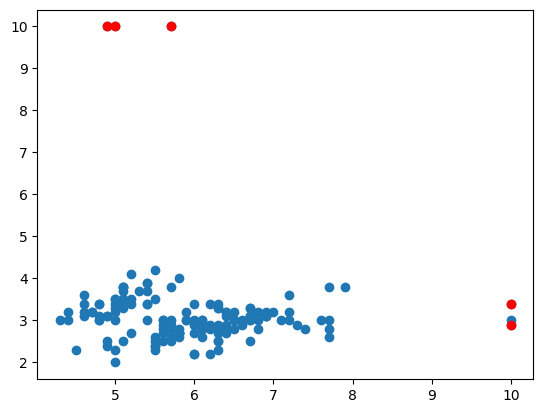

In [33]:
from sklearn.neighbors import LocalOutlierFactor
import mysql.connector
import matplotlib.pyplot as plt

# Informasi koneksi ke database MySQL
hostname = 'mysql-3832c5d5-ikbar21116.a.aivencloud.com'
port = 28482
username = 'avnadmin'
password = 'AVNS_mwAH3wybkSrDiGU5knO'
database = 'defaultdb'

# Membuat koneksi ke database MySQL
conn = mysql.connector.connect(
    host=hostname,
    port=port,
    user=username,
    password=password,
    database=database
)

# Membaca data dari database menggunakan Pandas
query = "SELECT SepalLengthCm, SepalWidthCm FROM iris_lof"
cursor = conn.cursor()
cursor.execute(query)
rows = cursor.fetchall()
x = [[row[0], row[1]] for row in rows]

# Menutup koneksi ke database
conn.close()

# Membuat model LOF
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.03)

# Melakukan prediksi outlier
y_pred = lof.fit_predict(x)

# Menampilkan data dengan outlier yang diidentifikasi
outlier_indices = [i for i, label in enumerate(y_pred) if label == -1]
values = [x[i] for i in outlier_indices]

plt.scatter([point[0] for point in x], [point[1] for point in x])
plt.scatter([point[0] for point in values], [point[1] for point in values], color='r')
plt.show()


Berdasarkan visualisasi data yang diperoleh diatas menunjukkan bahwa terdapat outlier dengan warna merah, outlier ini terdapat pada SepalLengthCm yang berada pada sumbu x dan SepalWidthCm yang berada pada sumbu y, dapat disimpulkan bahwa outlier berada pada sumbu x memliki jarak yang sangat jauh dibandingkan dengan sumbu y

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fee8661d-3654-474c-b939-c19e7b08cbbd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>